In [21]:
import pandas as pd
df = pd.read_csv('data.csv')

In [22]:
df = df[df["Variety"]=="White"]
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
1859,Gujarat,Amreli,Amreli,White,Oil Seeds,0.2,11500,13575,13250,02 Apr 2024
1860,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,11605,12250,11750,25 Mar 2023
1861,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,13300,14250,14250,04 Mar 2023
1862,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,14405,14500,14500,06 Mar 2023
1863,Gujarat,Amreli,Amreli,White,Oil Seeds,0.4,8250,12475,11750,21 Mar 2023
...,...,...,...,...,...,...,...,...,...,...
3066,Gujarat,Amreli,Amreli,White,Oil Seeds,409.6,6250,11600,10275,13 Jun 2022
3067,Gujarat,Amreli,Amreli,White,Oil Seeds,429.0,8000,14900,13595,23 May 2023
3068,Gujarat,Amreli,Amreli,White,Oil Seeds,430.7,5000,11110,10230,14 Jun 2022
3069,Gujarat,Amreli,Amreli,White,Oil Seeds,440.0,8950,13225,12550,12 Jul 2024


In [23]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y').dt.date
df = df[['Reported Date', 'Arrivals (Tonnes)', 'Modal Price (Rs./Quintal)']]
df = df.sort_values(by='Reported Date', ascending=True)
df

,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
2837,2019-11-01,129.3,10650
2712,2019-11-02,92.6,10650
2807,2019-11-04,119.0,10690
2817,2019-11-05,121.8,10735
2833,2019-11-06,127.0,10400
...,...,...,...
2283,2024-11-08,24.5,12020
2185,2024-11-09,17.9,11905
2489,2024-11-11,45.3,12350
2021,2024-11-12,9.8,11650


In [24]:
# Group by 'Reported Date' and aggregate
df = df.groupby('Reported Date').agg({
    'Arrivals (Tonnes)': 'sum',  # Sum of arrivals
    'Modal Price (Rs./Quintal)': 'mean'  # Mean of modal price
}).reset_index()

# Display the result
df


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
0,2019-11-01,129.3,10650.0
1,2019-11-02,92.6,10650.0
2,2019-11-04,119.0,10690.0
3,2019-11-05,121.8,10735.0
4,2019-11-06,127.0,10400.0
...,...,...,...
1207,2024-11-08,24.5,12020.0
1208,2024-11-09,17.9,11905.0
1209,2024-11-11,45.3,12350.0
1210,2024-11-12,9.8,11650.0


In [25]:
start_date = df['Reported Date'].min()
end_date = df['Reported Date'].max()

# Generate a list of all dates between the start and end date
all_dates = pd.date_range(start=start_date, end=end_date).date

# Find missing dates by comparing with the actual dates in the dataframe
missing_dates = set(all_dates) - set(df['Reported Date'])

# Output the missing dates and their count
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Total missing dates: {len(missing_dates)}")

Start Date: 2019-11-01
End Date: 2024-11-13
Missing dates: [datetime.date(2019, 11, 3), datetime.date(2019, 11, 10), datetime.date(2019, 11, 17), datetime.date(2019, 11, 24), datetime.date(2019, 11, 25), datetime.date(2019, 12, 1), datetime.date(2019, 12, 5), datetime.date(2019, 12, 8), datetime.date(2019, 12, 15), datetime.date(2019, 12, 22), datetime.date(2019, 12, 29), datetime.date(2020, 1, 5), datetime.date(2020, 1, 12), datetime.date(2020, 1, 14), datetime.date(2020, 1, 19), datetime.date(2020, 1, 26), datetime.date(2020, 2, 2), datetime.date(2020, 2, 9), datetime.date(2020, 2, 16), datetime.date(2020, 2, 21), datetime.date(2020, 2, 23), datetime.date(2020, 3, 1), datetime.date(2020, 3, 8), datetime.date(2020, 3, 10), datetime.date(2020, 3, 15), datetime.date(2020, 3, 22), datetime.date(2020, 3, 23), datetime.date(2020, 3, 24), datetime.date(2020, 3, 25), datetime.date(2020, 3, 26), datetime.date(2020, 3, 27), datetime.date(2020, 3, 28), datetime.date(2020, 3, 29), datetime.date(

In [26]:
def get_missing_percentage_by_year(start_date, end_date, reported_dates):
    missing_percentage_by_year = {}

    # Generate the date range from start to end date
    all_dates = pd.date_range(start=start_date, end=end_date).date

    # Loop over each year from start_date to end_date
    current_year = start_date.year
    while current_year <= end_date.year:
        # Determine the first and last date of the current year
        year_start = pd.to_datetime(f'{current_year}-01-01').date()
        year_end = pd.to_datetime(f'{current_year}-12-31').date()

        # If the year range overlaps with the provided date range, adjust it
        if year_start < start_date:
            year_start = start_date
        if year_end > end_date:
            year_end = end_date

        # Get all dates for the current year within the range
        year_dates = pd.date_range(start=year_start, end=year_end).date

        # Get missing dates for this year
        missing_year_dates = set(year_dates) - set(reported_dates)

        # Total days in the current year range
        total_days_in_year = len(year_dates)

        # Calculate missing percentage
        missing_percentage = (len(missing_year_dates) / total_days_in_year) * 100

        # Store the result
        missing_percentage_by_year[current_year] = {
            'missing_percentage': missing_percentage,
            'total_days': total_days_in_year,
            'missing_dates': sorted(missing_year_dates)
        }

        # Move to the next year
        current_year += 1

    return missing_percentage_by_year

# Calculate missing percentage yearwise
missing_percentage_by_year = get_missing_percentage_by_year(start_date, end_date, df['Reported Date'])

# Output the missing percentage for each year, including total days and missing dates
print("\nMissing dates percentage by year:")
for year, data in missing_percentage_by_year.items():
    print(f"{year}:")
    print(f"  Total days in year: {data['total_days']}")
    print(f"  Number of Missing days: {len(data['missing_dates'])}")
    print(f"  Missing percentage: {data['missing_percentage']:.2f}%")


Missing dates percentage by year:
2019:
  Total days in year: 61
  Number of Missing days: 11
  Missing percentage: 18.03%
2020:
  Total days in year: 366
  Number of Missing days: 130
  Missing percentage: 35.52%
2021:
  Total days in year: 365
  Number of Missing days: 119
  Missing percentage: 32.60%
2022:
  Total days in year: 365
  Number of Missing days: 113
  Missing percentage: 30.96%
2023:
  Total days in year: 365
  Number of Missing days: 143
  Missing percentage: 39.18%
2024:
  Total days in year: 318
  Number of Missing days: 112
  Missing percentage: 35.22%


In [27]:
# Convert columns to numeric, forcing non-numeric values to NaN
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')

# Forward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'].expanding().mean())
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'].expanding().mean())

# Backward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'][::-1].expanding().mean()[::-1])
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'][::-1].expanding().mean()[::-1])

df


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
0,2019-11-01,129.3,10650.0
1,2019-11-02,92.6,10650.0
2,2019-11-04,119.0,10690.0
3,2019-11-05,121.8,10735.0
4,2019-11-06,127.0,10400.0
...,...,...,...
1207,2024-11-08,24.5,12020.0
1208,2024-11-09,17.9,11905.0
1209,2024-11-11,45.3,12350.0
1210,2024-11-12,9.8,11650.0


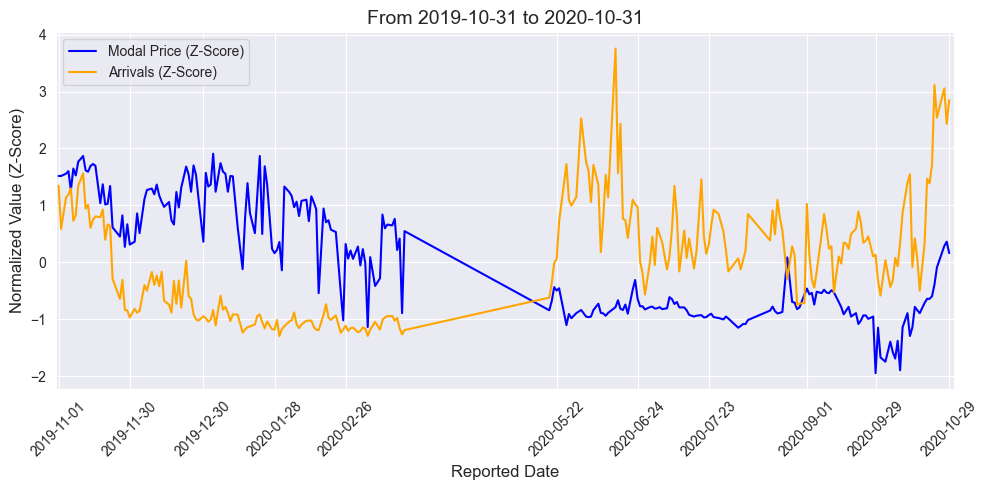

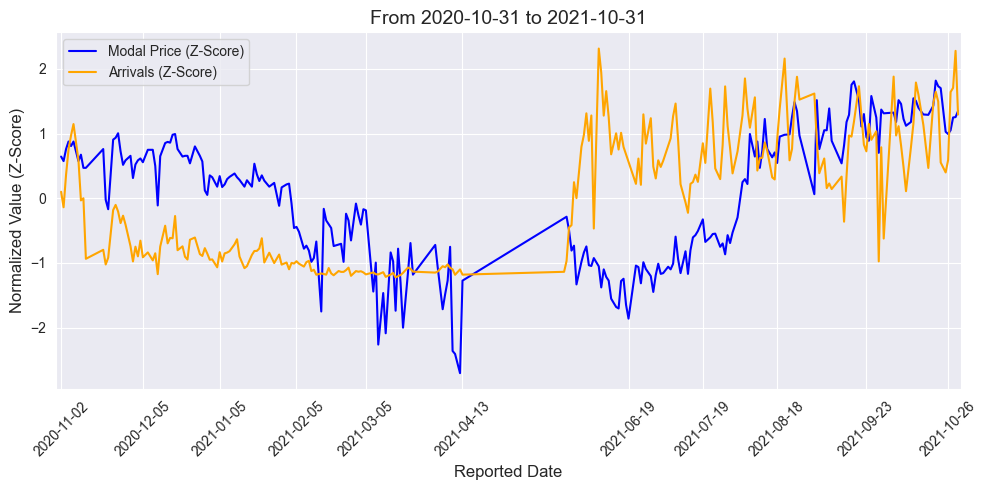

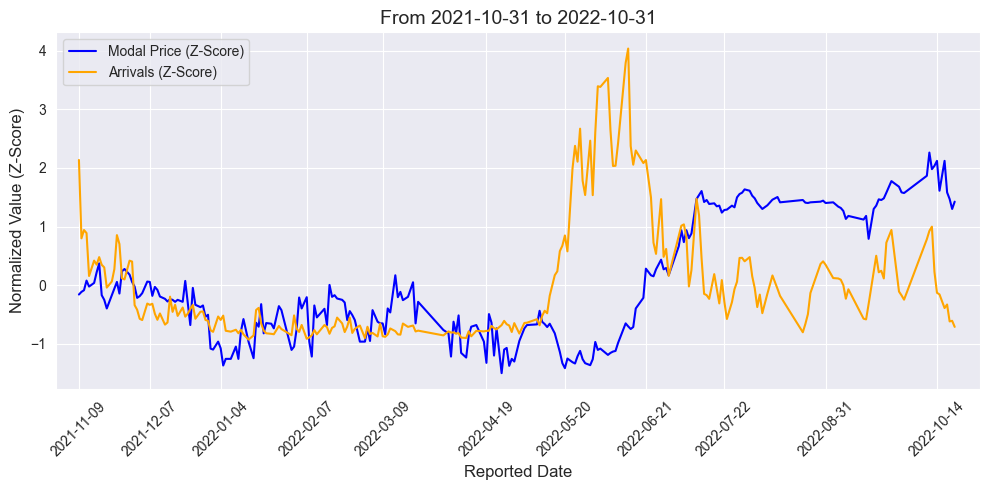

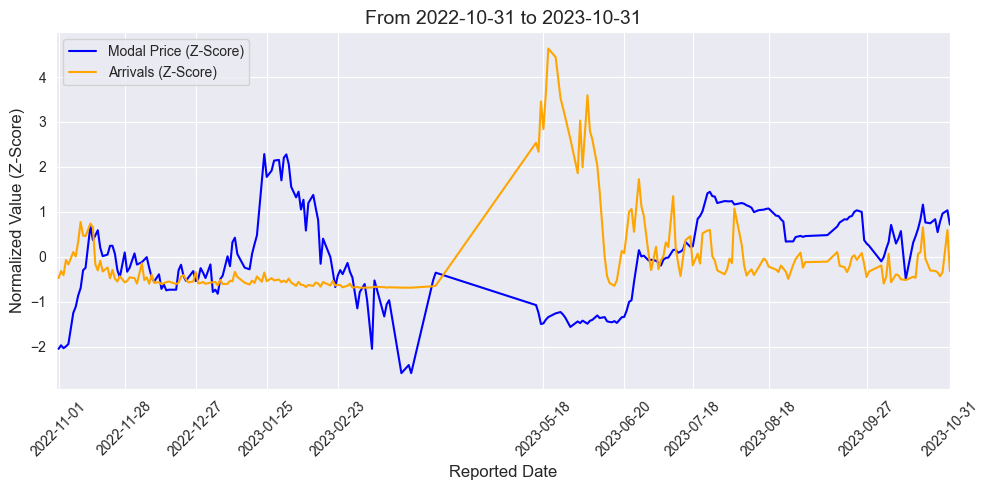

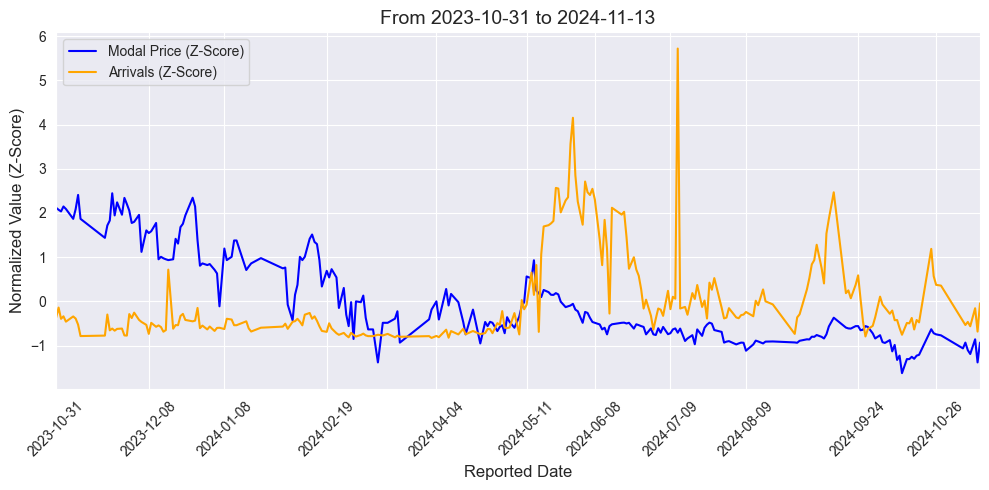

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Ensure the 'Reported Date' column is in datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y')

# Create a list of date ranges for the 5-year periods
date_ranges = [
    ('2019-10-31', '2020-10-31'),
    ('2020-10-31', '2021-10-31'),
    ('2021-10-31', '2022-10-31'),
    ('2022-10-31', '2023-10-31'),
    ('2023-10-31', '2024-11-13')
]

# Create separate DataFrames for each date range and store them in a dictionary
dfs = {}
for i, (start_date, end_date) in enumerate(date_ranges):
    dfs[f"df_{i+1}"] = df[(df['Reported Date'] >= start_date) & (df['Reported Date'] <= end_date)].copy()
    dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal) Z'] = zscore(dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal)'])
    dfs[f"df_{i+1}"]['Arrivals (Tonnes) Z'] = zscore(dfs[f"df_{i+1}"]['Arrivals (Tonnes)'])

# Plot each DataFrame independently
for i, (key, filtered_df) in enumerate(dfs.items()):
    plt.figure(figsize=(10, 5))

    # Plot the normalized 'Modal Price (Rs./Quintal)' and 'Arrivals (Tonnes)'
    plt.plot(filtered_df['Reported Date'], filtered_df['Modal Price (Rs./Quintal) Z'], label='Modal Price (Z-Score)', color='blue', linestyle='-', markersize=4)
    plt.plot(filtered_df['Reported Date'], filtered_df['Arrivals (Tonnes) Z'], label='Arrivals (Z-Score)', color='orange', linestyle='-', markersize=4)

    # Set titles and labels
    plt.title(f"From {date_ranges[i][0]} to {date_ranges[i][1]}", fontsize=14)
    plt.ylabel('Normalized Value (Z-Score)', fontsize=12)
    plt.xlabel('Reported Date', fontsize=12)
    plt.legend(loc='upper left')

    # Set x-axis limits and ticks for the specific date range
    plt.xlim(pd.to_datetime(date_ranges[i][0]), pd.to_datetime(date_ranges[i][1]))
    tick_interval = max(1, len(filtered_df) // 10)
    plt.xticks(filtered_df['Reported Date'][::tick_interval], rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [29]:
df.set_index('Reported Date', inplace=True)

In [30]:
import pandas as pd

target_map = df['Modal Price (Rs./Quintal)'].to_dict()

def create_features(df):
    """
    Create time series features based on time series index for weekly forecasting.
    """
    df = df.copy()

    # Time-based features
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    # Lag features
    df['lag14'] = (df.index - pd.Timedelta('14 days')).map(target_map)
    df['lag28'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    df['lag42'] = (df.index - pd.Timedelta('42 days')).map(target_map)
    df['lag56'] = (df.index - pd.Timedelta('56 days')).map(target_map)

    # Rolling window features
    for window in [14, 28, 42, 56]:
        df[f'rolling_mean_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).mean()
        df[f'rolling_median_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).median()
        df[f'rolling_std_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).std()

    # Exponential moving averages
    df['ema14'] = df['Modal Price (Rs./Quintal)'].ewm(span=14, adjust=False).mean()
    df['ema28'] = df['Modal Price (Rs./Quintal)'].ewm(span=28, adjust=False).mean()

    # Moving averages
    df['moving_avg_14'] = df['Modal Price (Rs./Quintal)'].rolling(window=14, min_periods=1).mean()
    df['moving_avg_28'] = df['Modal Price (Rs./Quintal)'].rolling(window=28, min_periods=1).mean()

    # Other statistical features
    df['max_56'] = df['Modal Price (Rs./Quintal)'].rolling(window=56, min_periods=1).max()
    df['min_56'] = df['Modal Price (Rs./Quintal)'].rolling(window=56, min_periods=1).min()
    df['range_56'] = df['max_56'] - df['min_56']

    return df


In [31]:
df = create_features(df)
df

,Arrivals (Tonnes),Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,...,rolling_mean_56,rolling_median_56,rolling_std_56,ema14,ema28,moving_avg_14,moving_avg_28,max_56,min_56,range_56
Reported Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,129.3,10650.0,4,4,11,2019,305,44,NaN,NaN,...,10650.000000,10650.0,NaN,10650.000000,10650.000000,10650.000000,10650.000000,10650.0,10650.0,0.0
2019-11-02,92.6,10650.0,5,4,11,2019,306,44,NaN,NaN,...,10650.000000,10650.0,0.000000,10650.000000,10650.000000,10650.000000,10650.000000,10650.0,10650.0,0.0
2019-11-04,119.0,10690.0,0,4,11,2019,308,45,NaN,NaN,...,10663.333333,10650.0,23.094011,10655.333333,10652.758621,10663.333333,10663.333333,10690.0,10650.0,40.0
2019-11-05,121.8,10735.0,1,4,11,2019,309,45,NaN,NaN,...,10681.250000,10670.0,40.491769,10665.955556,10658.430440,10681.250000,10681.250000,10735.0,10650.0,85.0
2019-11-06,127.0,10400.0,2,4,11,2019,310,45,NaN,NaN,...,10625.000000,10650.0,130.575649,10630.494815,10640.607651,10625.000000,10625.000000,10735.0,10400.0,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,24.5,12020.0,4,4,11,2024,313,45,12535.0,11855.0,...,12305.089286,12307.5,329.454771,12167.464136,12201.317583,12046.071429,12190.714286,13005.0,11325.0,1680.0
2024-11-09,17.9,11905.0,5,4,11,2024,314,45,12500.0,11325.0,...,12299.375000,12307.5,333.617994,12132.468918,12180.881888,12087.500000,12165.000000,13005.0,11325.0,1680.0
2024-11-11,45.3,12350.0,0,4,11,2024,316,46,12470.0,11750.0,...,12301.160714,12317.5,333.616534,12161.473062,12192.545206,12130.357143,12154.642857,13005.0,11325.0,1680.0


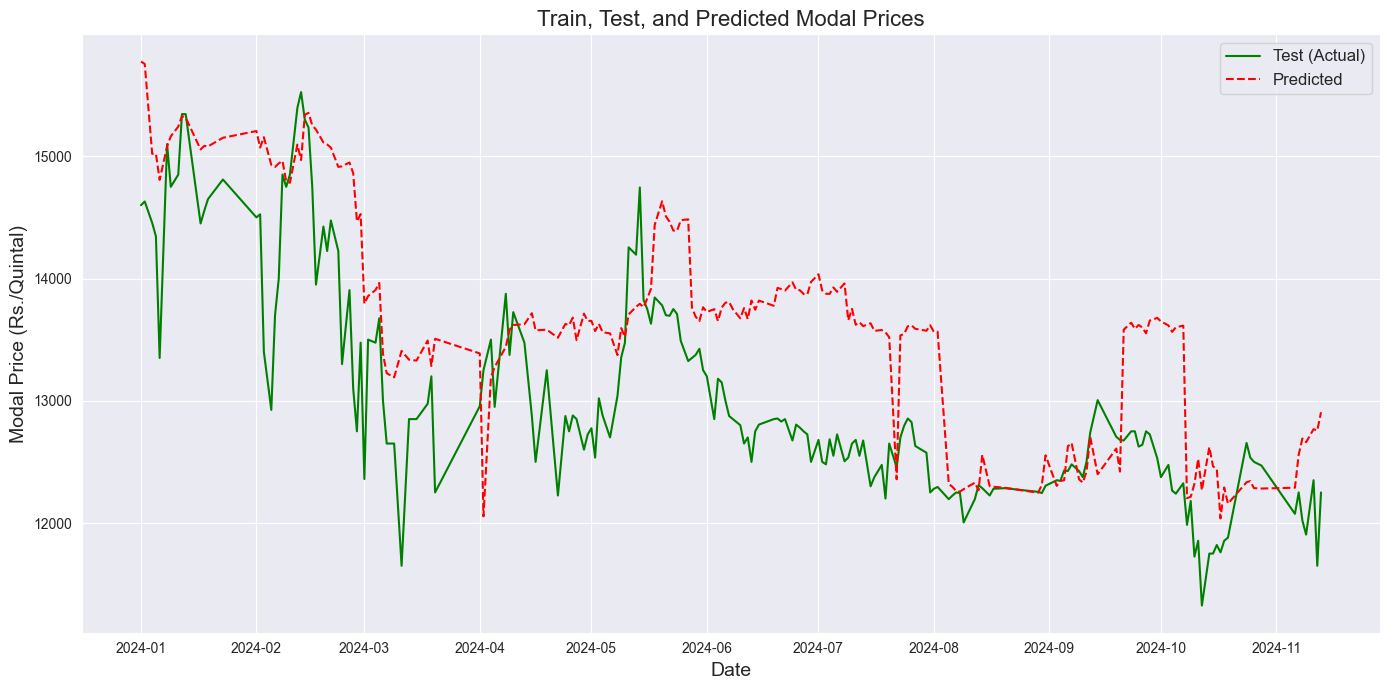

Metrics:
Mean Absolute Error (MAE): 695.5983
Symmetric Mean Absolute Percentage Error (SMAPE): 5.2114
Median Absolute Percentage Error (MDAPE): 5.2730
Geometric Mean Relative Absolute Error (GMRAE): 0.9022


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-13']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))


# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Train, Test, and Predicted Modal Prices", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [33]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming X_train, y_train, X_test, and y_test are defined
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'booster': ['gbtree', 'dart']
}

# Generate all combinations of hyperparameters
param_combinations = list(product(
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['n_estimators'],
    param_grid['booster']
))

# Store results for comparison
results = []

# Iterate through each parameter combination
for params in param_combinations:
    # Unpack parameters
    learning_rate, max_depth, n_estimators, booster = params

    # Define the model with the current parameters
    model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        booster=booster,
        random_state=42
    )

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate performance using MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Save the results
    results.append({
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'n_estimators': n_estimators,
        'booster': booster,
        'mae': mae
    })

    print(f"Evaluated params: {params} | MAE: {mae:.4f}")

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Find the best parameters (lowest MAE)
best_params = results_df.loc[results_df['mae'].idxmin()]

# Print the best parameters and corresponding score
print("\nBest Parameters:")
print(best_params)

# Train the final model with the best parameters
final_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']),
    n_estimators=int(best_params['n_estimators']),
    booster=best_params['booster'],
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Calculate metrics for the final model
final_mae = mean_absolute_error(y_test, y_pred_final)
print(f"\nFinal Model MAE: {final_mae:.4f}")

# Output the final predictions for visualization or further analysis
print("\nFinal Predictions:")
print(pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_final}, index=y_test.index).head())


Evaluated params: (0.01, 3, 50, 'gbtree') | MAE: 820.3789
Evaluated params: (0.01, 3, 50, 'dart') | MAE: 820.3789
Evaluated params: (0.01, 3, 100, 'gbtree') | MAE: 492.6869
Evaluated params: (0.01, 3, 100, 'dart') | MAE: 492.6869
Evaluated params: (0.01, 3, 150, 'gbtree') | MAE: 525.0561
Evaluated params: (0.01, 3, 150, 'dart') | MAE: 525.0561
Evaluated params: (0.01, 5, 50, 'gbtree') | MAE: 908.1665
Evaluated params: (0.01, 5, 50, 'dart') | MAE: 908.1665
Evaluated params: (0.01, 5, 100, 'gbtree') | MAE: 506.5204
Evaluated params: (0.01, 5, 100, 'dart') | MAE: 506.5204
Evaluated params: (0.01, 5, 150, 'gbtree') | MAE: 468.1617
Evaluated params: (0.01, 5, 150, 'dart') | MAE: 468.1617
Evaluated params: (0.01, 7, 50, 'gbtree') | MAE: 907.1406
Evaluated params: (0.01, 7, 50, 'dart') | MAE: 907.1406
Evaluated params: (0.01, 7, 100, 'gbtree') | MAE: 517.6831
Evaluated params: (0.01, 7, 100, 'dart') | MAE: 517.6831
Evaluated params: (0.01, 7, 150, 'gbtree') | MAE: 482.1249
Evaluated params: (

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:08:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


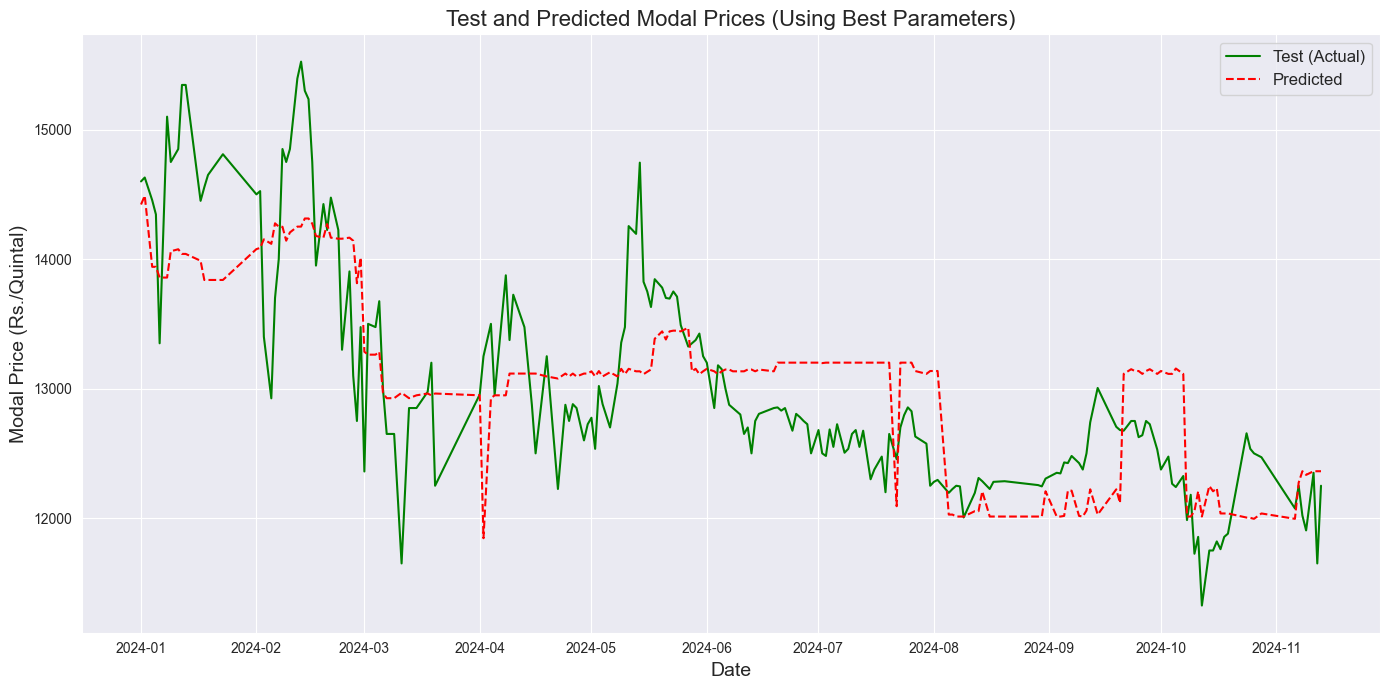

Metrics:
Mean Absolute Error (MAE): 468.1617
Symmetric Mean Absolute Percentage Error (SMAPE): 3.5610
Median Absolute Percentage Error (MDAPE): 3.1859
Geometric Mean Relative Absolute Error (GMRAE): 0.6948


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-13']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Initialize the model with the best parameters
model = XGBRegressor(**best_params)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Test and Predicted Modal Prices (Using Best Parameters)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [35]:
def calculate_biweekly_metrics(test_data, y_test, y_pred):
    # Ensure the index is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(test_data.index):
        raise TypeError("The index of test_data must be a datetime type.")

    weekly_metrics = []

    # Group by 2-week periods using the index
    for period, period_data in test_data.groupby(pd.Grouper(freq='2W')):
        # Get the integer positions of the indices using get_indexer
        positions = test_data.index.get_indexer(period_data.index)

        # Get actual and predicted values for the current 2-week period
        period_y_true = y_test.iloc[positions]  # Use iloc for integer-based indexing
        period_y_pred = y_pred[positions]  # Use integer-based indexing for numpy array

        # Calculate the metrics for this period
        mae_period = mean_absolute_error(period_y_true, period_y_pred)
        smape_period = smape(period_y_true.values, period_y_pred)
        mdape_period = mdape(period_y_true.values, period_y_pred)
        gmrae_period = gmrae(period_y_true.values, period_y_pred)

        # Store the metrics for the 2-week period
        weekly_metrics.append({
            'Period': period,
            'MAE': mae_period,
            'SMAPE': smape_period,
            'MDAPE': mdape_period,
            'GMRAE': gmrae_period
        })

    return pd.DataFrame(weekly_metrics)

# Calculate 2-week metrics
biweekly_metrics_df = calculate_biweekly_metrics(test_data, y_test, y_pred)

# Print the 2-week metrics
print("2-Week Period Metrics:")
print(biweekly_metrics_df)


2-Week Period Metrics:
       Period         MAE     SMAPE     MDAPE       GMRAE
0  2024-01-07  349.028516  2.481441  2.820315    1.150228
1  2024-01-21  913.150635  6.308894  5.373611    3.862660
2  2024-02-04  646.186035  4.566175  4.317709    1.637480
3  2024-02-18  741.861165  5.130105  4.271947    1.297739
4  2024-03-03  509.559393  3.766170  2.137488    0.736954
5  2024-03-17  334.996826  2.639247  1.880916  695.176175
6  2024-03-31  325.585938  2.557989  1.907256    0.399148
7  2024-04-14  517.620728  3.963596  3.457074    0.989025
8  2024-04-28  366.443848  2.851006  1.886052    2.254879
9  2024-05-12  391.153942  2.974659  2.806973    1.560156
10 2024-05-26  539.470540  3.954388  2.888235    3.913304
11 2024-06-09  177.688721  1.352112  1.377521    1.266664
12 2024-06-23  398.813477  3.080978  2.807725    5.874456
13 2024-07-07  545.621257  4.224449  4.084403    6.746578
14 2024-07-21  691.867543  5.389563  5.309166    8.661945
15 2024-08-04  561.745801  4.392988  3.973257    

/Users/tejas/PycharmProjects/Spice_Price_Forecast/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:08:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "mae" } are not used.

  warnings.warn(smsg, UserWarning)


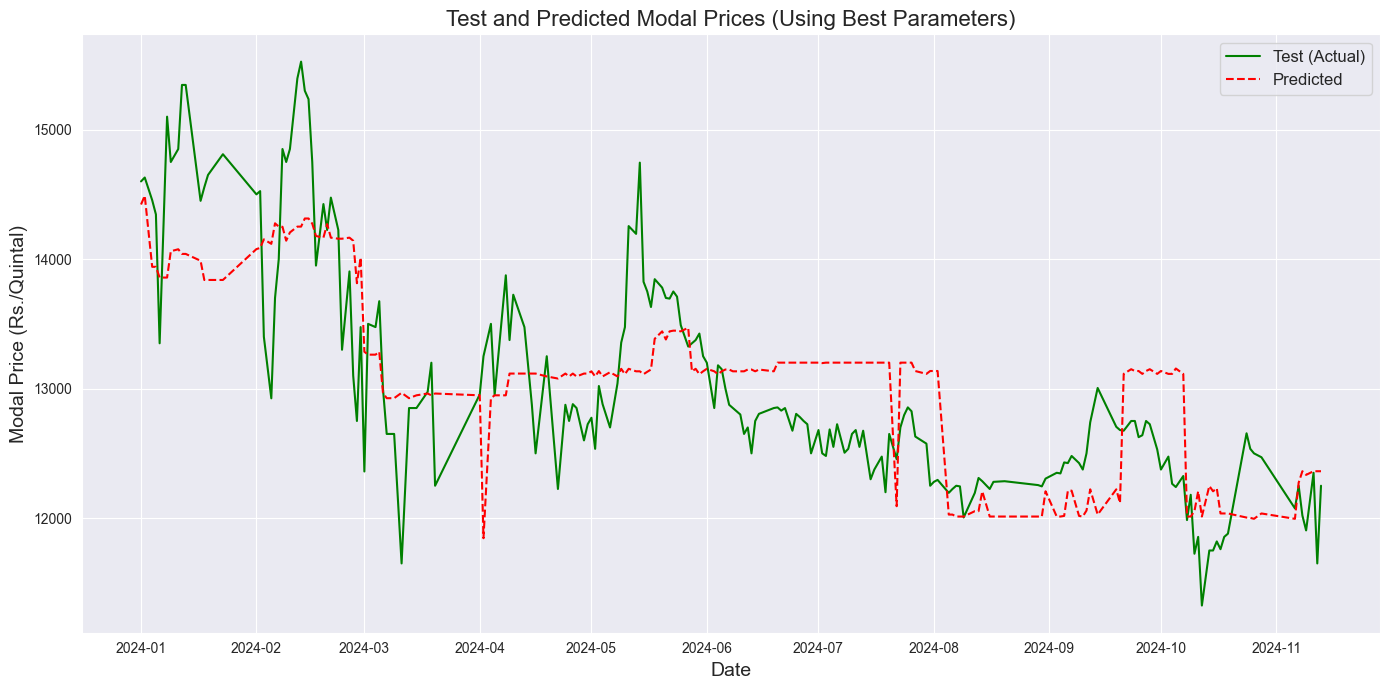

Metrics:
Mean Absolute Error (MAE): 468.1617
Symmetric Mean Absolute Percentage Error (SMAPE): 3.5610
Median Absolute Percentage Error (MDAPE): 3.1859
Geometric Mean Relative Absolute Error (GMRAE): 0.6948


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-13']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Initialize the model with the best parameters
model = XGBRegressor(**best_params)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Test and Predicted Modal Prices (Using Best Parameters)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


Sliding Window Metrics:
Mean Absolute Error (MAE): 476.0274
Symmetric Mean Absolute Percentage Error (SMAPE): 3.6151
Median Absolute Percentage Error (MDAPE): 3.2248
Geometric Mean Relative Absolute Error (GMRAE): 0.6935


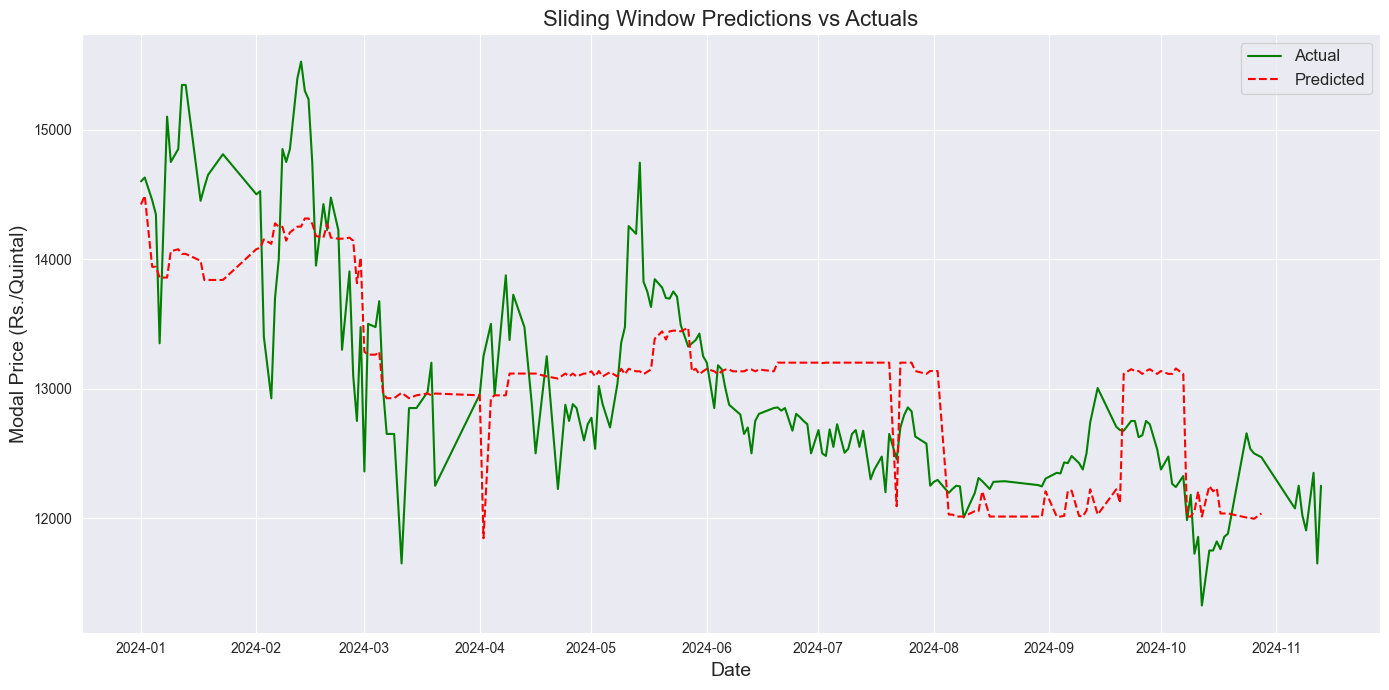

In [37]:
from datetime import timedelta

# Define the sliding window size (2 weeks)
window_size = 14  # Days

# Initialize results storage
all_predictions = []
all_actuals = []

# Start the sliding window process
current_start = test_data.index.min()
current_end = current_start + timedelta(days=window_size - 1)

while current_end <= test_data.index.max():
    # Extract the current window data
    current_window = test_data.loc[current_start:current_end]

    # Extract features and target for the current window
    X_current = current_window[feature_columns]
    y_actual = current_window['Modal Price (Rs./Quintal)']

    # Make predictions for the current window
    y_pred_current = model.predict(X_current)

    # Store predictions and actual values
    all_predictions.extend(y_pred_current)
    all_actuals.extend(y_actual.values)

    # Move the window forward
    current_start = current_end + timedelta(days=1)
    current_end = current_start + timedelta(days=window_size - 1)

# Calculate metrics for the entire test set based on sliding window predictions
mae = mean_absolute_error(all_actuals, all_predictions)
smape_val = smape(np.array(all_actuals), np.array(all_predictions))
mdape_val = mdape(np.array(all_actuals), np.array(all_predictions))
gmrae_val = gmrae(np.array(all_actuals), np.array(all_predictions))

# Print metrics
print("Sliding Window Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Actual', color='green')
plt.plot(test_data.index[:len(all_predictions)], all_predictions, label='Predicted', color='red', linestyle='--')
plt.title("Sliding Window Predictions vs Actuals", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
